**SECONDE CHANCE, PROJET DE PYTHON POUR L'ANNÉE ACADÉMIQUE 2023-2024**

**NOM DE L'ETUDIANT** : **AFADONOU KOKOUVI**

**PARCOURS**:    **CEPOPP**

**NOM DE L'ENSEIGNANT**:    **ALEXANDRE WAREMBOURG**

**CE PROJET VISE A FAIRE UNE ANALYSE DES ELASTICITES PRIX ET PRIX CROISES DE LA DEMANDE A PARTIR D'UNE BASE DE DONNEES**

# **SOMMAIRE**
**I - MANIPULATION DES DONNEES**

  I-1 IMPORTATION DES LIBRAIRIES

  I-2 IMPORTATION DES BASES DE DONNEES

  I-3 VISUALISATION DES BASES DE DONNEES
  
  I-4 DEPIVOTAGE DE LA BASE DE DONNEES
  
**II - LA JOINTURE DES BASES DE DONNEES**
        
  II-1 VISUALISATION DES NAS

  II-2 VISUALISATION DES DOUBLONS

**III - ANALYSE STATISTIQUE**

  III-1 STATISTIQUE DESCRIPTIVE DES VARIABLES QUANTITATIVES

  III-2 STATISTIQUE DESCRIPTIVE DES VARIABLES QUALITATIVES
  
  III-3 GRAPHIQUE SUR LA RELATION ENTRE LE PRIX ET LA VENTE

**IV - CALCUL DE L'ELASTICITE PRIX DE LA DEMANDE**

  IV-1 GRAPHIQUE DE L'ELASTICITE PRIX DE LA DEMANDE
         
**V - CALCUL DE L'ELASTICITE PRIX CROISEE DE LA DEMANDE**

  V-1 GRAPHIQUE DE L'ELASTICITE PRIX CROISEE DE LA DEMANDE

**VI - CONCLUSION**
 

# **I - MANIPULATION DES DONNEES**

**I-1 . IMPORTATION DES LIBRAIRIES NECESSAIRE POUR LA MANIPULATION DES BASES DE DONNEES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from IPython.display import display
from itertools import combinations
import matplotlib.dates as mdates

**I-2 . IMPORTATION DES BASES DE DONNEES**

In [2]:
calendar = pd.read_csv(r"C:\Users\pc\Desktop\forecast\m5_forecast_calendar_dataset.csv")
price = pd.read_csv(r"C:\Users\pc\Desktop\forecast\m5_forecast_price_dataset.csv")
sales = pd.read_csv(r"C:\Users\pc\Desktop\forecast\m5_forecast_sales_dataset.csv")

**I-3 . VISUALISATION DES TROIS BASES DE DONNEES**

In [3]:
calendar.head(2)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0


In [4]:
price.head(2)

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_006,11210,1.0
1,CA_1,HOBBIES_1_006,11211,1.0


In [5]:
sales.head(2)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_006_CA_1_validation,HOBBIES_1_006,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,0,1,0,0,0,2,0,0
1,HOBBIES_1_015_CA_1_validation,HOBBIES_1_015,HOBBIES_1,HOBBIES,CA_1,CA,4,0,0,5,...,1,4,2,2,1,0,0,2,5,4


**I-4 . DEPIVOTONS LA BASE DE DONNEES NOMMEES "SALES" (AVEC LA FONCTION "MELT") AFIN DE TRANSFORMER LES LIGNES EN COLONNES ET LES COLONNES EN LIGNES**

In [6]:
cate_var = ['id', 'item_id', 'store_id', 'cat_id', 'dept_id', 'state_id'] # Sélection des variables catégorielles
num_var = [x for x in sales.columns if x not in cate_var] #Sélection des variables numériques

sales1 = pd.melt( #Dépivotage
    sales, 
    id_vars=cate_var, 
    value_vars=num_var,
    var_name="d",
    value_name="ventes"
)

sales1.head(2)

,id,item_id,store_id,cat_id,dept_id,state_id,d,ventes
0,HOBBIES_1_006_CA_1_validation,HOBBIES_1_006,CA_1,HOBBIES,HOBBIES_1,CA,d_1,0
1,HOBBIES_1_015_CA_1_validation,HOBBIES_1_015,CA_1,HOBBIES,HOBBIES_1,CA,d_1,4


# **II - JOINTURE**

***La base de donnee calendar et sales1 ont en commun une colonne nommee "d"; nous allons faire la jointure sur cette colonne en utilisant le "inner join"***

In [7]:
data1 = pd.merge(sales1, calendar, how="inner", on=["d"])
data1.head(2)

,id,item_id,store_id,cat_id,dept_id,state_id,d,ventes,date,wm_yr_wk,...,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,HOBBIES_1_006_CA_1_validation,HOBBIES_1_006,CA_1,HOBBIES,HOBBIES_1,CA,d_1,0,2011-01-29,11101,...,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
1,HOBBIES_1_015_CA_1_validation,HOBBIES_1_015,CA_1,HOBBIES,HOBBIES_1,CA,d_1,4,2011-01-29,11101,...,1,1,2011,NaN,NaN,NaN,NaN,0,0,0


**Nous allons proceder à la jointure de la base de donnees "price" sur la base de donnees "data1"; nous allons utiliser le "inner join".**
**cette jointure se fera sur les colonnes "store_id", "item_id" et "wm_yr_wk" qui sont communes pour les deux bases de données**

In [8]:
data = pd.merge(data1, price, how="inner", on=["store_id", "item_id", "wm_yr_wk"])
data.head(2)

,id,item_id,store_id,cat_id,dept_id,state_id,d,ventes,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_015_CA_1_validation,HOBBIES_1_015,CA_1,HOBBIES,HOBBIES_1,CA,d_1,4,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,0.7
1,HOBBIES_1_015_CA_1_validation,HOBBIES_1_015,CA_1,HOBBIES,HOBBIES_1,CA,d_2,0,2011-01-30,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,0.7


**II-1 . VISUALISATION DES NAS DANS NOTRE BASE DE DONNEES**

In [9]:
data.isnull().sum() / len(data)*100

id               0.000000
item_id          0.000000
store_id         0.000000
cat_id           0.000000
dept_id          0.000000
state_id         0.000000
d                0.000000
ventes           0.000000
date             0.000000
wm_yr_wk         0.000000
weekday          0.000000
wday             0.000000
month            0.000000
year             0.000000
event_name_1    91.995744
event_type_1    91.995744
event_name_2    99.795655
event_type_2    99.795655
snap_CA          0.000000
snap_TX          0.000000
snap_WI          0.000000
sell_price       0.000000
dtype: float64

Dans notre base de donnees, on peut constater que les variables "event_name_1"; "event_type_1"; "event_name_2" et "event_type_2" ont plus de 90% de NA. Nous allons supprimer ces colonnes car en procedant à l'imputation de ces NAS, on risque de dénaturer l'échantillon et en plus ces colonnes ne vont pas nous servir dans notre analyse.

In [10]:
data.drop(columns=['event_name_1', 'event_name_2', 'event_type_1', 'event_type_2'], inplace=True)

**II-2 . VISUALISATION DES DOUBLONS**

In [11]:
data.duplicated().sum()

0

# **III - ANALYSE STATISTIQUE**

Cette analyse vise à explorer la base de données pour voir la distribution de chaque variable

**III-1 . STATISTIQUE DESCRIPTIVE DES VARIABLES QUANTITATIVES**

In [12]:
num_cols = ['ventes', 'sell_price', 'wm_yr_wk', 'wday', 'month', 'year', 'snap_CA', 'snap_TX', 'snap_WI'] # Sélection des colonnes numériques
cat_cols = ['item_id', 'store_id', 'cat_id', 'dept_id', 'state_id', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2'] # Sélection des colonnes  catégorielles

In [13]:
# Analyse des colonnes numériques
data[num_cols].describe().T #le "T" sert à transposer le résultat

,count,mean,std,min,25%,50%,75%,max
ventes,8252210.0,1.318588,3.546863,0.00,0.00,0.00,1.00,436.00
sell_price,8252210.0,4.659209,3.779351,0.05,2.24,3.48,5.94,30.98
wm_yr_wk,8252210.0,11376.525953,142.784232,11101.00,11246.00,11408.00,11512.00,11613.00
wday,8252210.0,3.996613,2.000844,1.00,2.00,4.00,6.00,7.00
month,8252210.0,6.403044,3.482215,1.00,3.00,6.00,9.00,12.00
year,8252210.0,2013.582781,1.461523,2011.00,2012.00,2014.00,2015.00,2016.00
snap_CA,8252210.0,0.328294,0.469592,0.00,0.00,0.00,1.00,1.00
snap_TX,8252210.0,0.328748,0.469758,0.00,0.00,0.00,1.00,1.00
snap_WI,8252210.0,0.328792,0.469774,0.00,0.00,0.00,1.00,1.00


Nous avons dans notre base de données 8 252 210 observations dont la vente moyenne est de 1.32 unités avec un ecart type de 3.55 unités ainsi qu'un maximum de 436 unités. Le prix de vente minimum tout produit confondu est de 0.05 USD avec une moyenne de 4.66 USD et un maximum de 31 USD. La vente de ces produits avait commencé depuis 2011 et s'était arretée en 2016 (d'apres notre base de donnée) et s'étale sur tous les mois de l'année et tous les jours de la semaine. On observe aussi qu'à certains jours de la semaine, certains magasins font des promotions sur des produits.

**III-2 . STATISTIQUES DESCRIPTIVES DES VARIABLES QUALITATIVES**

In [14]:
data.describe(include='object').T # "T" sert à transposer les lignes en colonnes

,count,unique,top,freq
id,8252210,5590,HOBBIES_1_015_CA_1_validation,1913
item_id,8252210,559,FOODS_3_535,19130
store_id,8252210,10,TX_2,847628
cat_id,8252210,3,FOODS,4046568
dept_id,8252210,7,FOODS_3,2164212
state_id,8252210,3,CA,3261397
d,8252210,1913,d_1913,5590
date,8252210,1913,2016-04-24,5590
weekday,8252210,7,Saturday,1182880


Une analyse exploratoire de la base de données plus précesement les variables qualitatives nous montre que la vente a atteind son pic le 24 Avril 2016 dans l'Etat de la Californie et le magasin 2 qui se trouve à Texas est reconnu pour sa vente la plus élevée parmis tous les magasins. Il est à noter aussi que les produits alimentaires sont plus vendus parmis les trois produits étudiés. Enfin, les magasins, toutes catégories confondues vendent mieux les weekends que les autres jours de la semaine et surtout les samedis.

**III-3 . QUELLE RELATION Y A T IL ENTRE LE PRIX ET LA VENTE**

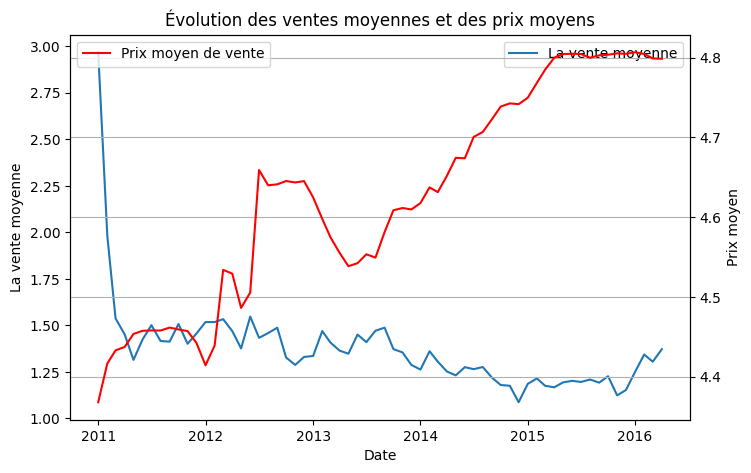

In [15]:
# Conversion de la colonne de date
data['date'] = pd.to_datetime(data['date'])

# Calcul des moyennes mensuelles des ventes et des prix
data['month_year'] = data['date'].dt.to_period('M').dt.to_timestamp()
monthly_data = data.groupby('month_year').agg({'ventes': 'mean', 'sell_price': 'mean'}).reset_index()

# Tracer les données
fig, ax1 = plt.subplots(figsize=(8, 5))

# Tracer les ventes
ax1.set_xlabel('Date')
ax1.set_ylabel('La vente moyenne')
ax1.plot(monthly_data['month_year'], monthly_data['ventes'], label='La vente moyenne')
ax1.legend()

# Tracer le prix
ax2 = ax1.twinx()
ax2.set_ylabel('Prix moyen')
ax2.plot(monthly_data['month_year'], monthly_data['sell_price'], label='Prix moyen de vente', color='red')
ax2.legend()
plt.grid()
# Représentation graphique
plt.title('Évolution des ventes moyennes et des prix moyens')
plt.show()


Ce graphique nous montre qu'il y a une relation négative entre le prix et la vente d'un bien c'est à dire plus le prix d'un bien augmente moins sera la demande de ce bien; cette relation se fait sentir plus à partir de l'année 2012 où le prix a augmenté considéremment et la vente a chuté meme si cette variation n'est pas proportionnelle. Ce graphique confirme la théorie de la rationnalité des consommateurs en économie qui stipule qu'une augmentation du prix d'un bien entraine la diminution de la demande de ce bien et qui pourrait entrainer une augmentation de la demande d'un autre bien substituable.

# **IV - CALCUL DE L'ELASTICITE PRIX DE LA DEMANDE**

**L'élasticité prix de la demande se calcule par le rapport entre le taux de variation de la quantité demandée et le taux de variation du prix**

L’élasticité prix-demande permet d’interpréter les réactions de la demande face à une augmentation de prix d’un bien. Plus l’élasticité est supérieur à 1 et plus la demande dépend du facteur prix.
Plus l'élasticité est inféreieur à 1 et moins la demande est réactive à une variation de prix

**Nous allons transformer la colonne de la date en format date et filtrer la colonne "sell_price" et "vente" pour qu'il n'y ait pas de zero afin de calculer la variation sans avoir la valeur infinie**.

In [16]:
# Filtrage des données
data_filtered = data[(data['sell_price'] > 0) & (data['ventes'] > 0)]

# Ajout des colonnes dérivées de la date
data_filtered['day_of_week'] = data_filtered['date'].dt.day_name()
data_filtered['year'] = data_filtered['date'].dt.year

# Tri des données
data_filtered = data_filtered.sort_values(['cat_id', 'store_id', 'date'])

# Calcul des variations en pourcentage des prix et des quantités avec logarithmes
data_filtered['log_sell_price'] = np.log(data_filtered['sell_price'])
data_filtered['log_ventes'] = np.log(data_filtered['ventes'])
data_filtered['variation_log_prix'] = data_filtered.groupby(['cat_id', 'store_id'])['log_sell_price'].diff()
data_filtered['variation_log_quantite'] = data_filtered.groupby(['cat_id', 'store_id'])['log_ventes'].diff()

# Calcul de l'élasticité prix de la demande
data_filtered['elasticite_prix'] = data_filtered['variation_log_quantite'] / data_filtered['variation_log_prix']

# Suppression des valeurs infinies ou NaN dans 'elasticite_prix'
data_filtered = data_filtered.replace([np.inf, -np.inf], np.nan).dropna(subset=['elasticite_prix'])

# Calcul de l'élasticité prix et des ventes totales
result = data_filtered.groupby(['cat_id', 'store_id']).agg(
    elasticite_prix=('elasticite_prix', 'mean'),  # Calculer la moyenne de l'élasticité prix
    ventes_total=('ventes', 'sum'),
    prix_vente_moyen=('sell_price', 'mean')
).reset_index()

# affichage du résultat
result_styled = (result.style
    .bar(subset=['elasticite_prix', 'ventes_total', 'prix_vente_moyen'])
)

result_styled

C:\Users\pc\AppData\Local\Temp\ipykernel_12368\3930928694.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['day_of_week'] = data_filtered['date'].dt.day_name()
C:\Users\pc\AppData\Local\Temp\ipykernel_12368\3930928694.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['year'] = data_filtered['date'].dt.year


,cat_id,store_id,elasticite_prix,ventes_total,prix_vente_moyen
0,FOODS,CA_1,-0.657289,816092,3.274045
1,FOODS,CA_2,-0.115526,580724,3.152497
2,FOODS,CA_3,-1.000674,1161292,3.337274
3,FOODS,CA_4,-0.809503,452632,3.235550
4,FOODS,TX_1,0.011064,580954,3.152905
5,FOODS,TX_2,-0.238774,738661,3.209730
6,FOODS,TX_3,-0.544598,555925,3.204942
7,FOODS,WI_1,-0.628195,586405,3.107817
8,FOODS,WI_2,-0.530512,812620,3.223552
9,FOODS,WI_3,-0.627981,769703,3.138835


**Les produits alimentaires (FOODS)** 

les produits alimentaires sont inélastique (cette élasticité prix de la demande est négative) au prix dans tous les magasins sauf le magasin 3 en Californie ce qui voudrait dire qu'une augmentation du prix  de vente de 1% va entrainer une diminution moins proportionnelle de la demande. Dans ces magasins, il est possible d'augmenter légèrement le prix des produits sans réduire considérablement la vente.

Le magasin 3 en Californie a une élasticité prix de la demande superieur à 1 en valeur absolue (les produits alimenatires dans le magasin 3 en Californie sont élastique au prix), ce qui voudrait dire qu'une augmentation de 1% du prix dans ce magasin va entrainer une diminution plus que proportionnelle de la vente. Pour augmenter la vente dans ce magasin, il serait conseillé de diminuer légèrement le prix et donc augmenter le profit.

**Les produits de loisirs (HOBBIES)**
Les produits de loisirs sont inélastique au prix (élasticité prix de la demande est inférieur à 1 en valeur absolue pour tous les magasins). Dans ce cas, une augmentation du prix des produits de loisirs ne va pas entrainer une diminution proportionnelle de la vente et donc il est possible d'augmenter légèrement le prix sans réduire considérablement la vente mais augmenter le profit.


**Les produis ménagers (HOUSEHOLD)**
Les produits ménagers sont élastiques au prix dans le magasin 3 au Texas et les magasins 2,3 au Winconscin; cette élasticité est positive. Ceci montre qu'une augmentation du prix dans l'un de ces magasins va entrainer une augmentation plus que proportionnelle de la vente. A part ces 3 magasins, les produits ménagers sont inélastiques au prix, c'est à dire une élasticité prix de la demande inférieur à 1.

En somme, les produits alimentaires et de loisirs ont une élasticité prix de la demande négative ce qui voudrait dire que le prix et la demande évoluent dans le sens opposé, c'est à dire plus le prix de ces biens augmente moins est sa demande. Cependant, les produits ménagers ont une élasticité prix de la demande positive c'est à dire plus le prix de ce bien augmente plus sa demande augmente. On observe ces situations dans le cas des biens de GIFFEN ou encore les biens de VEBLEN. Cette Positivité de l'élastcité prix de la demande pour les produits ménagers peut s'expliquer par le faite que les consommateurs sont plus attirés par les produits de qualité ou de luxe donc plus le bien est de bonne qualité plus son prix est élevé et plus les consommateurs le désire. Pour augmenter la vente et par conséquent le profit pour ces produits, il serait conseillé d'augmenter légèrement le prix de vente dans tous les magasins. Cette augmentation du prix de vente aura plus d'éffet dans le magasin 3 au Texas car ayant une élastcité prix de la demande la plus élevée. Nous pouvons illustrer ceci à travers un graphique.


**IV-1 . GRAPHIQUE DE L'ELASTICITE PRIX DE LA DEMANDE**

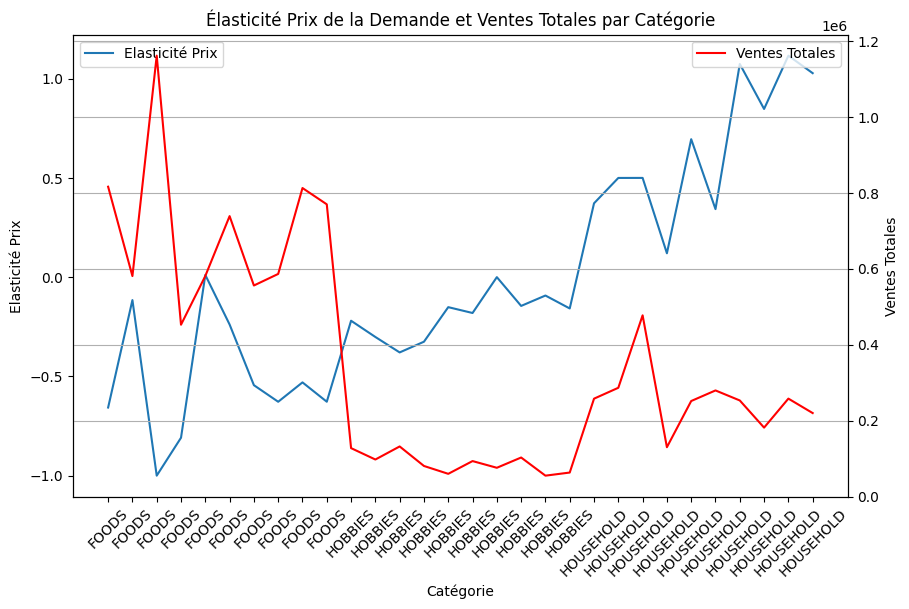

In [17]:
# Préparation des données pour le graphique
categories = result['cat_id']
x = np.arange(len(categories))

# Création du graphique en ligne
fig, ax1 = plt.subplots(figsize=(10, 6))

# graphique pour l'élasticité prix de la demande
ax1.plot(x, result['elasticite_prix'], label='Elasticité Prix')

ax1.set_xlabel('Catégorie')
ax1.set_ylabel('Elasticité Prix')
ax1.tick_params(axis='y')

# graphique pour les ventes totales
ax2 = ax1.twinx()
ax2.plot(x, result['ventes_total'], label='Ventes Totales', color = 'red')

# Ajout des labels
ax2.set_ylabel('Ventes Totales')
ax1.set_xticks(x)
ax1.set_xticklabels(categories, rotation=45)
ax1.set_title('Élasticité Prix de la Demande et Ventes Totales par Catégorie')

# Ajout de la légende
ax1.legend()
ax2.legend()
plt.grid()

# Affichage du graphique
plt.show()


**SI LES CONSOMMATEURS DIMINUENT LA CONSOMMATION D'UN BIEN SUITE A L'AUGMENTATION DU PRIX, COMMENT VONT ILS SE COMPORTER VIS A VIS  DES AUTRES BIENS?**

# **V - CALCUL DE L'ELASTICITE PRIX CROISEE DE LA DEMANDE**

L’élasticité prix-croisée permet d’interpréter les réactions de la demande d’un bien 'A' face à une variation de prix pour un bien différent 'B'. 

In [18]:


# Tri des données par 'cat_id', 'store_id', 'item_id', et 'date'
data_filtered = data_filtered.sort_values(['cat_id', 'store_id', 'item_id', 'date'])

# Calcul des variations en pourcentage des prix et des quantités avec logarithmes
data_filtered['variation_log_prix'] = data_filtered.groupby(['cat_id', 'store_id', 'item_id'])['log_sell_price'].diff()
data_filtered['variation_log_quantite'] = data_filtered.groupby(['cat_id', 'store_id', 'item_id'])['log_ventes'].diff()

# Calcul de l'élasticité prix croisée de la demande
data_filtered['elasticite_prix_croisee'] = data_filtered['variation_log_quantite'] / data_filtered['variation_log_prix']

# Filtrer les données pour enlever les valeurs infinies ou NaN dans 'elasticite_prix_croisee'
data_filtered = data_filtered.replace([np.inf, -np.inf], np.nan).dropna(subset=['elasticite_prix_croisee'])

# Agrégation de l'élasticité prix croisée de la demande
result = data_filtered.groupby(['cat_id', 'store_id']).agg(
    elasticite_prix_croisee=('elasticite_prix_croisee', 'mean')
).reset_index()
# Calcul des prix et des ventes moyens
prix_vente_mean = data_filtered.groupby(['cat_id', 'store_id']).agg(
    prix_vente=('sell_price', 'mean'),
    ventes_total=('ventes', 'sum')
).reset_index()
# Fusionner avec les calculs des prix moyens et des ventes totales
result = pd.merge(result, prix_vente_mean, on=['cat_id', 'store_id'], how='left')

result_styled = result.style.bar(subset=['elasticite_prix_croisee', 'prix_vente', 'ventes_total'])

# Affichage du résultat
print("Élasticité prix croisée de la demande")
result_styled

Élasticité prix croisée de la demande


,cat_id,store_id,elasticite_prix_croisee,prix_vente,ventes_total
0,FOODS,CA_1,0.737847,4.127981,2444
1,FOODS,CA_2,1.579750,3.650883,1767
2,FOODS,CA_3,1.989198,3.759949,5116
3,FOODS,CA_4,1.034396,4.050389,1676
4,FOODS,TX_1,0.461486,3.421945,4215
5,FOODS,TX_2,0.982491,3.450958,4117
6,FOODS,TX_3,-0.093997,3.466261,4149
7,FOODS,WI_1,-1.776861,3.935650,2445
8,FOODS,WI_2,-6.770810,4.069222,2874
9,FOODS,WI_3,-2.111447,4.003852,3234


**LES PRODUITS ALIMENTAIRES (FOODS)**:
On constate que tous les magasins ont une élasticité prix croisée de la demande positive (sauf le magasins 3 au Texas et tous les magasins au Winconscin) montrant que la demande pour les produits alimentaires dans ces magasins augmente suite à une hausse du prix d'un autre produit. Ceci nous amène à dire que les produits alimentaires dans ces magasins sont des substituts pour d'autres produits. Par contre, dans le magasin 3 au Texas et tous les magasins au Winconscin l'élasticité prix coroisée de la demande est négative indiquant que les produits alimentaires sont complémentaires à d'autres produits dans ces magasins.

**Les produits de loisirs (HOBBIES)**:
Dans les magasins 1 en Californie, les magasins 3 au Texas et au Winconscin, l'élasticité prix croisée de la demande est positive ce qui montre que les produits de loisirs dans ces magasins peuvent etre substitués à d'autres produits, ce qui augmenterait la demande lorsque le prix des autres produits augmente; cette substitution est plus remarquable dans le magasin 1 en Californie. Cependant, dans le reste des magasins pour les produits de loisir, l'élasticité prix croisée de la demande est négative indiquant une relation de complémentarité avec d'autres produits. Cette complémentarité se fait beaucoup plus sentir dans le magasin 4 en Californie et les magasins 2 au Winconscin et au Texas.

**Les produits ménagers (HOUSEHOLD)**:
Tous les magasins en Californie (sauf le magasin 2) et tous les magasins au Texas ainsi que le magasin 2 au Winconscin ont une élasticité prix croisée de la demande négative montrant que les produits ménagers sont complémentaires à d'autres produits, c'est à dire qu'une augmentation du prix des autres produits réduit la demande pour les produits ménagers. On peut expliquer cette complémentarité par le faite que les produits ménagers sont utilisés cojointement avec d'autres produits. Prenons l'exemple des boites de conservation et les produits frais; une augmentation du prix des produits frais va entrainer une diminution de la demande pour les boites de conservation.
Les magasins 1 et 3 au Winconscin et le magasin 2 en Californie ont une élasticité prix croisée de la demande positive sugérant que dans ces magasins les produits ménagers sont des substituts à d'autres produits augmentant ainsi la demande lorsque le prix des autres produits augmentent. Lorsque le prix d'une boîte de congelation augmente par exemple, les consommateurs vont augmentater l'achat des sacs de congelation qui pourraient jouer le meme rôle que la boîte. Dans les lignes qui vont suivre, nous allons illustrer cette élasticité prix croisée de la demande par un graphique.

**V-1 . GRAPHIQUE DE L'ELASTICITE PRIX CROISEE DE  LA DEMANDE**

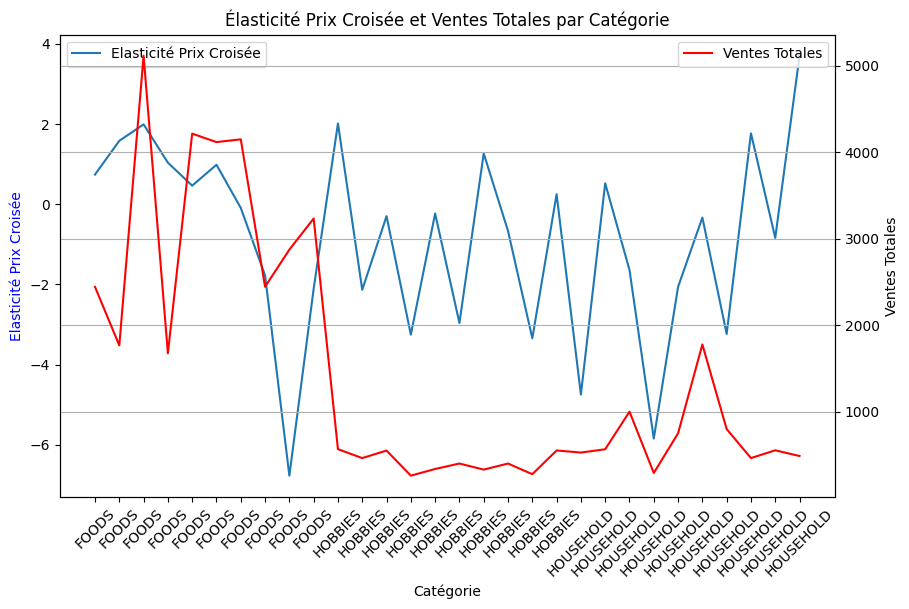

In [19]:
# Création du graphique en ligne
fig, ax1 = plt.subplots(figsize=(10, 6))

# graphique pour l'élasticité prix croisée
ax1.set_xlabel('Catégorie')
ax1.set_ylabel('Elasticité Prix Croisée', color='blue')
ax1.plot(x, result['elasticite_prix_croisee'], label='Elasticité Prix Croisée')

# Graphique les ventes totales
ax2 = ax1.twinx()
ax2.set_ylabel('Ventes Totales')
ax2.plot(x, result['ventes_total'], color= 'red', label='Ventes Totales')
ax2.legend(loc='upper right')

# Ajout des labels
ax1.set_xticks(x)
ax1.set_xticklabels(categories, rotation=45)
ax1.set_title('Élasticité Prix Croisée et Ventes Totales par Catégorie')
ax1.legend(loc='upper left')
plt.grid()

# Affichage du graphique
plt.show()


# **VI - CONCLUSION**

En résumé, on en déduire à travers cette analyse qu'un produit est inélastique au prix si son élasticité prix de la demande est inférieur à 1 en valeur absolue; c'est le cas par exemple des magasins 1 en Californie. On peut ajouter à ceci en disant qu'un produit est élastique si son élasticité prix de la demande est supérieur à 1 en valeur basolue, c'est le cas du magasin 3 au Winconscin pour les produits ménagers. Concernant l'élasticité prix croisée de la demande, un produit est substituable à un autre produit si son élasticité prix croisée  est positive c'est le cas du magasin 3 au Winconscin pour les produits ménagers. Un produit est complémentaire à un autre si son élasticité prix croisée de la demande est négative; c'est le cas par exemple du magasin 4 en Californie pour les produits ménagers. 